<>:6: SyntaxWarning: invalid escape sequence '\E'
<>:6: SyntaxWarning: invalid escape sequence '\E'
C:\Users\u1171032\AppData\Local\Temp\ipykernel_36616\3902360783.py:6: SyntaxWarning: invalid escape sequence '\E'
  shapefile_path = 'Eastern_Aus_Bunbury\Eastern_Aus_Bunbury.shp'


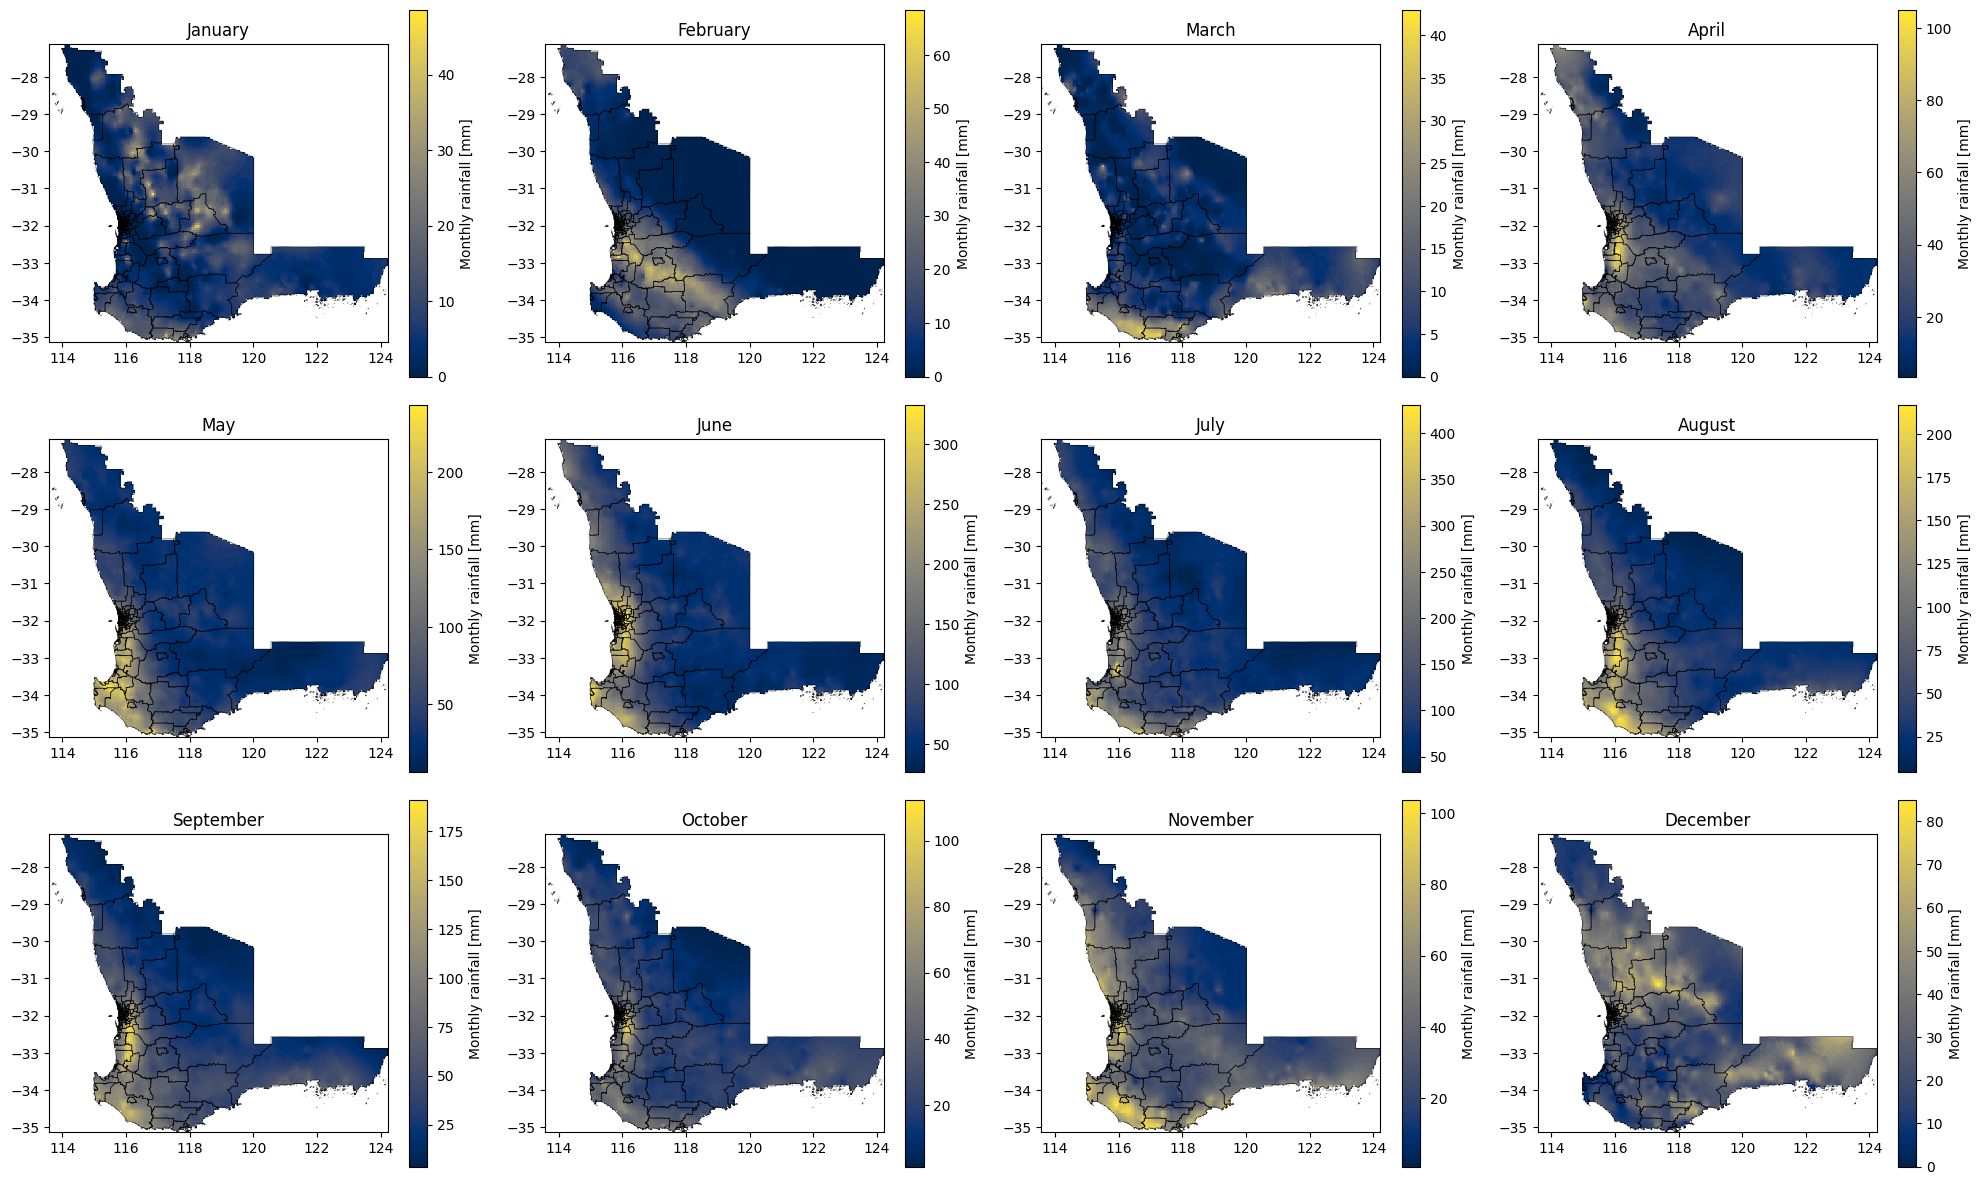

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Load the shapefile for Queensland regions ===
shapefile_path = 'Eastern_Aus_Bunbury\Eastern_Aus_Bunbury.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the monthly max temperature data for QLD ===
ds = xr.open_dataset(r'Data\raster\combined_climate\climate_1991.nc')
monthly_rain = ds['monthly_rain']  # Adjust variable name as needed

# === Create figure and axes for the plot ===
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# === Plot each month with its own colorbar ===
for i, month in enumerate(monthly_rain.time):
    ax = axes[i]
    data = monthly_rain.sel(time=month)
    
    # Plot with individual colorbar
    data.plot(ax=ax, cmap='cividis', add_colorbar=True)
    
    # Overlay region boundaries
    qld_shape.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.7)
    
    # Set the title
    ax.set_title(month.dt.strftime('%B').item())
    ax.set_xlabel('')
    ax.set_ylabel('')

# === Remove unused axes if any ===
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# === Final layout ===
plt.tight_layout()
plt.show()
